# Simple Pendulum example: forward and backward integrations

In [1]:
using OrdinaryDiffEq 
using IRKGaussLegendre
using Plots

## ODE definition 

In [2]:
#Constants
const g = 9.81
L = 1.0

#Initial Conditions
u₀ = [0, π / 2]

#Define the problem
function simplependulum(du, u, p, t)
    θ = u[1]
    dθ = u[2]
    du[1] = dθ
    du[2] = -(g / L) * sin(θ)
end

simplependulum (generic function with 1 method)

# Forward Integrations 

### Case 1 (adaptive)

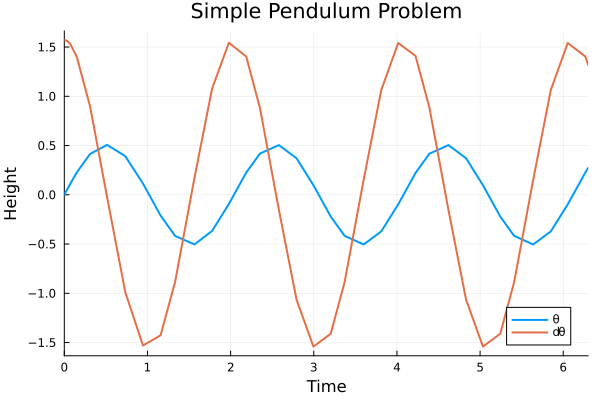

In [3]:
tspan = (0.0, 6.3)

#Pass to solvers
prob = ODEProblem(simplependulum, u₀, tspan)
#sol = solve(prob, Tsit5())
sol = solve(prob, IRKGL16(), reltol=1e-14, abstol=1e-14)

#Plot
plot(sol, linewidth = 2, title = "Simple Pendulum Problem", xaxis = "Time",
    yaxis = "Height", label = ["\\theta" "d\\theta"])

In [4]:
@show (sol.retcode, sol.t[1], sol.t[end]);
sol.t

(sol.retcode, sol.t[1], sol.t[end]) = (SciMLBase.ReturnCode.Success, 0.0, 6.3)


36-element Vector{Float64}:
 0.0
 0.01
 0.03
 0.07
 0.15
 0.31
 0.514181125280798
 0.7330761872358589
 0.9463065906690233
 1.1575428055787818
 1.3328706604956533
 1.564884826131938
 1.776797626468188
 ⋮
 4.223525717220678
 4.390227172003325
 4.618935373466419
 4.831187955871726
 5.034628174841646
 5.242958339993569
 5.409629638633526
 5.638312467582614
 5.850565456658035
 6.0540058685209095
 6.264918449748646
 6.3

### Case 2 (adaptive)

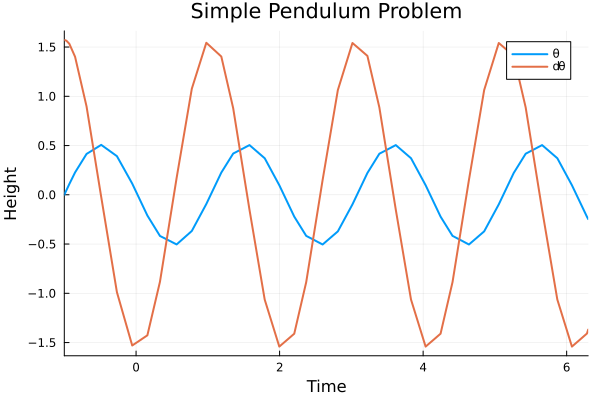

In [5]:
tspan = (-1., 6.3)

#Pass to solvers
prob = ODEProblem(simplependulum, u₀, tspan)
#sol = solve(prob, Tsit5())
sol = solve(prob, IRKGL16(), reltol=1e-14, abstol=1e-14)

#Plot
plot(sol, linewidth = 2, title = "Simple Pendulum Problem", xaxis = "Time",
    yaxis = "Height", label = ["\\theta" "d\\theta"])

In [6]:
@show (sol.retcode, sol.t[1], sol.t[end]);
sol.t

(sol.retcode, sol.t[1], sol.t[end]) = (SciMLBase.ReturnCode.Success, -1.0, 6.3)


41-element Vector{Float64}:
 -1.0
 -0.99
 -0.97
 -0.93
 -0.85
 -0.69
 -0.485818874719202
 -0.26692381276414107
 -0.05369340933097668
  0.15754280557878175
  0.3328706604956533
  0.5648848261319378
  0.776797626468188
  ⋮
  4.242958339993569
  4.409629638633526
  4.638312467582614
  4.850565456658035
  5.0540058685209095
  5.262334710087114
  5.4290081278892215
  5.6576957059353505
  5.869948843132042
  6.073390204248931
  6.282394606551372
  6.3

### Case 3 (constant step size)

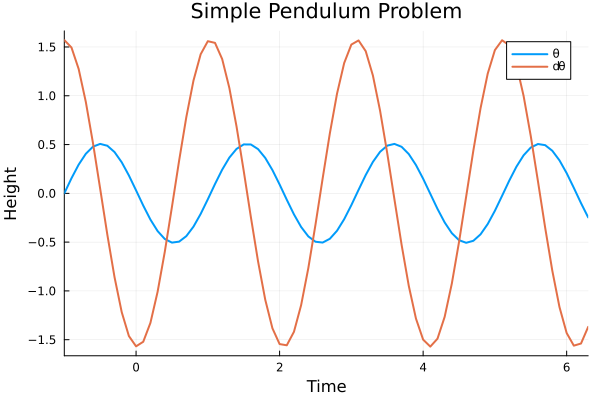

In [7]:
tspan = (-1., 6.3)

dt0=0.1

#Pass to solvers
prob = ODEProblem(simplependulum, u₀, tspan)
#sol = solve(prob, Tsit5())
sol = solve(prob, IRKGL16(), dt=dt0, adaptive=false)

#Plot
plot(sol, linewidth = 2, title = "Simple Pendulum Problem", xaxis = "Time",
    yaxis = "Height", label = ["\\theta" "d\\theta"])

In [8]:
@show (sol.retcode, sol.t[1], sol.t[end]);
sol.t

(sol.retcode, sol.t[1], sol.t[end]) = (SciMLBase.ReturnCode.Success, -1.0, 6.3)


74-element Vector{Float64}:
 -1.0
 -0.9
 -0.8
 -0.7
 -0.6
 -0.5
 -0.39999999999999997
 -0.29999999999999993
 -0.19999999999999996
 -0.09999999999999995
  5.551115123125783e-17
  0.10000000000000006
  0.20000000000000007
  ⋮
  5.2
  5.300000000000001
  5.4
  5.5
  5.6000000000000005
  5.7
  5.800000000000001
  5.9
  6.0
  6.1000000000000005
  6.2
  6.3

# Backward Integrations

### Case 1

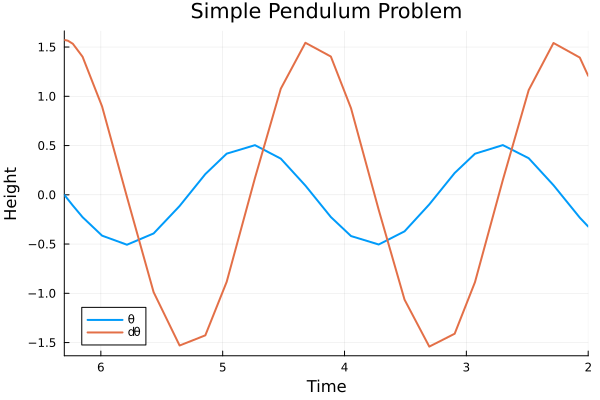

In [33]:
tspan = (6.3, 2.)

#Pass to solvers
prob = ODEProblem(simplependulum, u₀, tspan)
sol = solve(prob, IRKGL16(), reltol=1e-14, abstol=1e-14)

#Plot
plot(sol, linewidth = 2, title = "Simple Pendulum Problem", xaxis = "Time",
    yaxis = "Height", label = ["\\theta" "d\\theta"])

In [34]:
@show (sol.retcode, sol.t[1], sol.t[end]);
sol.t

(sol.retcode, sol.t[1], sol.t[end]) = (SciMLBase.ReturnCode.Success, 6.3, 2.0)


26-element Vector{Float64}:
 6.3
 6.29
 6.27
 6.2299999999999995
 6.1499999999999995
 5.99
 5.785818874719202
 5.5669238127641405
 5.353693409330977
 5.142457194421218
 4.967129339504346
 4.735115173868062
 4.523202373531812
 4.321091832579163
 4.11223242974666
 3.946599083738542
 3.7196236204049478
 3.5074094438338523
 3.3042521072743756
 3.0959404164266253
 2.9293329838127105
 2.700549581704843
 2.4882865335512796
 2.2847957361112066
 2.068807183359053
 2.0

**Note**

-When tf=0, the integrator not return exactly zero

-If tf=1., the integrator return exactly one

### Case 2

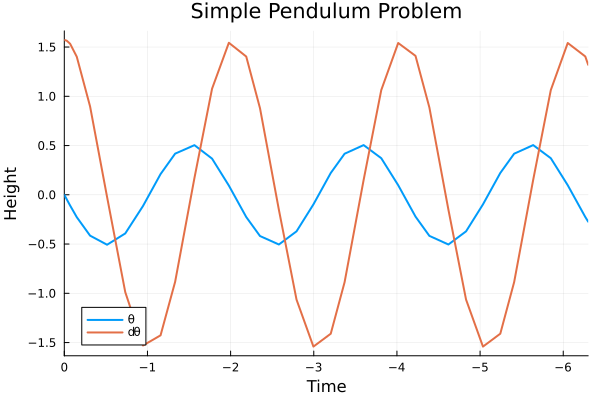

In [11]:
tspan = (0.0, -6.3)

#Pass to solvers
prob = ODEProblem(simplependulum, u₀, tspan)
sol = solve(prob, IRKGL16(), reltol=1e-14, abstol=1e-14)

#Plot
plot(sol, linewidth = 2, title = "Simple Pendulum Problem", xaxis = "Time",
    yaxis = "Height", label = ["\\theta" "d\\theta"])

In [12]:
@show (sol.retcode, sol.t[1], sol.t[end]);
sol.t

(sol.retcode, sol.t[1], sol.t[end]) = (SciMLBase.ReturnCode.Success, 0.0, -6.3)


36-element Vector{Float64}:
  0.0
 -0.01
 -0.03
 -0.07
 -0.15
 -0.31
 -0.514181125280798
 -0.7330761872358589
 -0.9463065906690233
 -1.1575428055787818
 -1.3328706604956533
 -1.564884826131938
 -1.776797626468188
  ⋮
 -4.223525717220678
 -4.390227172003325
 -4.618935373466419
 -4.831187955871726
 -5.034628174841646
 -5.242958339993569
 -5.409629638633526
 -5.638312467582614
 -5.850565456658035
 -6.0540058685209095
 -6.264918449748646
 -6.3

### Case 3

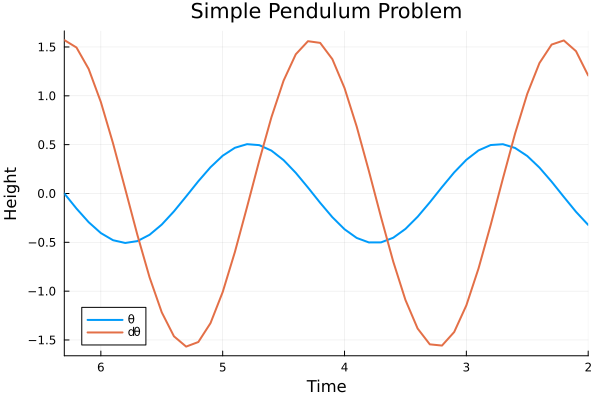

In [35]:
tspan = (6.3, 2.)

dt0=1/10
#Pass to solvers
prob = ODEProblem(simplependulum, u₀, tspan)
sol = solve(prob, IRKGL16(), dt=dt0, adaptive=false)

#Plot
plot(sol, linewidth = 2, title = "Simple Pendulum Problem", xaxis = "Time",
    yaxis = "Height", label = ["\\theta" "d\\theta"])

In [36]:
@show (sol.retcode, sol.t[1], sol.t[end]);
sol.t

(sol.retcode, sol.t[1], sol.t[end]) = (SciMLBase.ReturnCode.Success, 6.3, 2.0)


44-element Vector{Float64}:
 6.3
 6.2
 6.1
 6.0
 5.8999999999999995
 5.8
 5.7
 5.6
 5.5
 5.3999999999999995
 5.3
 5.2
 5.1
 ⋮
 3.0999999999999996
 2.9999999999999996
 2.8999999999999995
 2.8
 2.6999999999999997
 2.5999999999999996
 2.4999999999999996
 2.3999999999999995
 2.3
 2.1999999999999997
 2.0999999999999996
 2.0